# Analyzing Factors Impacting Medical Charges: Insights for Cost Reduction and Health Improvement
Analyzed medical charges dataset to gain insights into the factors that influence medical charges. Used various data visualization techniques to explore the data to identify patterns and correlations in the dataset. 
The insurance dataset was obtained from: https://github.com/stedy/Machine-Learning-with-R-datasets.git using (insurance.csv).












# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

#Load CSV to df



In [ ]:
df = pd.read_csv('insurance.csv')


Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Pre-Processing Data

In [ ]:
## Check for missing values
print("Missing values:")
print(df.isnull().sum())


Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
## Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())




Number of duplicates: 1


In [ ]:
## Drop duplicates
df.drop_duplicates(inplace=True)


In [ ]:
## Convert categorical variables to numerical
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})


In [ ]:
# Preview the cleaned data
print("\nPreview of the cleaned data:")
print(df.head())


# Preview the cleaned data
print("\nPreview of the cleaned data:")
print(df.head())



Preview of the cleaned data:
   age  sex     bmi  children  smoker     region      charges
0   19    1  27.900         0       1  southwest  16884.92400
1   18    0  33.770         1       0  southeast   1725.55230
2   28    0  33.000         3       0  southeast   4449.46200
3   33    0  22.705         0       0  northwest  21984.47061
4   32    0  28.880         0       0  northwest   3866.85520


In [ ]:
## Basic descriptive statistics
print("\nBasic descriptive statistics:")
print(df.describe())


Basic descriptive statistics:
               age          sex          bmi     children       smoker  \
count  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000   
mean     39.222139     0.495138    30.663452     1.095737     0.204936   
std      14.044333     0.500163     6.100468     1.205571     0.403806   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.290000     0.000000     0.000000   
50%      39.000000     0.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            charges  
count   1337.000000  
mean   13279.121487  
std    12110.359656  
min     1121.873900  
25%     4746.344000  
50%     9386.161300  
75%    16657.717450  
max    63770.428010  


#Exploratory Data Analysis

This histogram shows the distribution of medical charges in the dataset. The x-axis represents the charges in dollars, while the y-axis shows the count of the number of instances with that charge. 

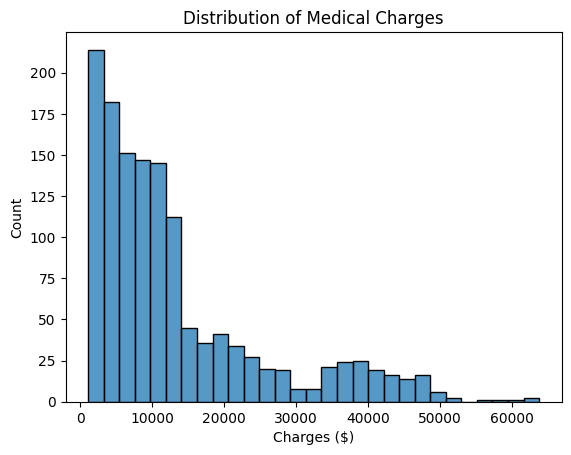

In [ ]:
## Distribution of charges
sns.histplot(df.charges)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges ($)")
plt.show()

The output shows the distribution of medical charges by smoking status. The plot is a histogram where the x-axis represents the charges in dollars, and the y-axis represents the count of individuals. The plot is split into two sections, one for smokers and one for non-smokers, where the colors blue and orange are used, respectively.


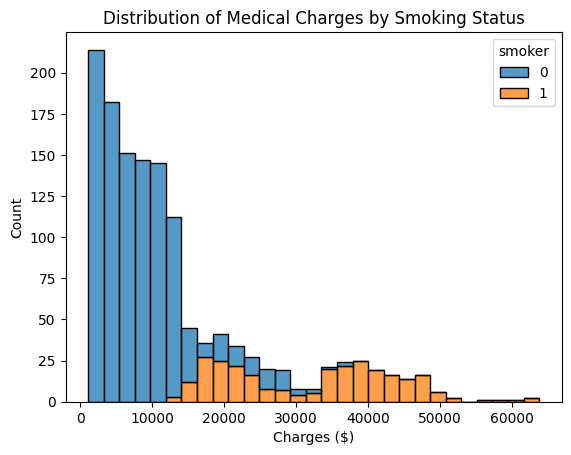

In [ ]:
# Distribution of charges by smoker status
sns.histplot(df, x="charges", hue="smoker", multiple="stack")
plt.title("Distribution of Medical Charges by Smoking Status")
plt.xlabel("Charges ($)")
plt.show()

The box plot displays the distribution of medical charges by region and smoking status. Each box represents the interquartile range (IQR), or the middle 50% of the data, and the line within the box represents the median charge. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, and any points beyond the whiskers are considered outliers.



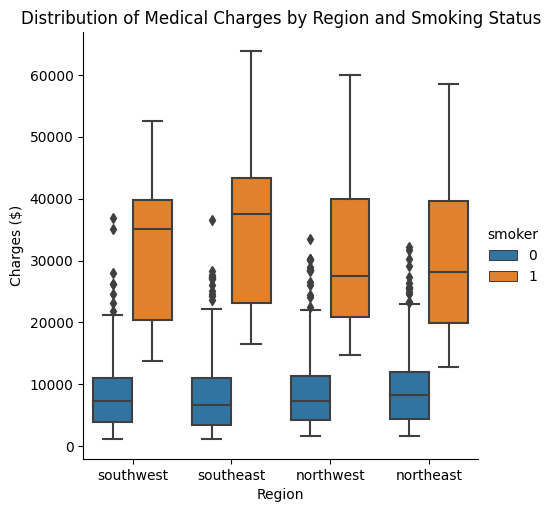

In [ ]:
## Distribution of charges by region and smoker status
sns.catplot(x="region", y="charges", hue="smoker", kind="box", data=df)
plt.title("Distribution of Medical Charges by Region and Smoking Status")
plt.xlabel("Region")
plt.ylabel("Charges ($)")
plt.show()

The output is a heatmap that represents the correlation between each pair of features in the dataset. The heatmap shows a range of colors from blue to red, where blue indicates a negative correlation and red indicates a positive correlation. The darker the color, the stronger the correlation. 

<ipython-input-14-e0fc1bb20006>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


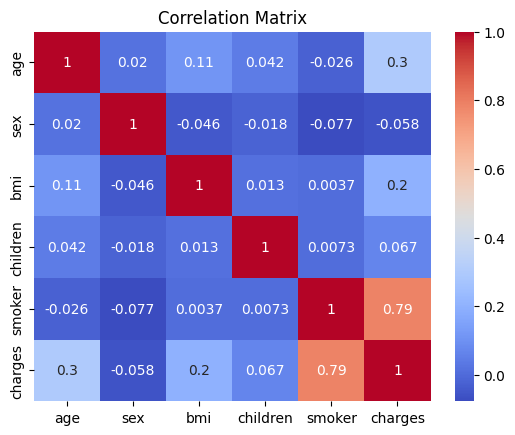

In [ ]:
## Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The linear regression plot shows the relationship between charges and age, with the data points grouped by smoker status. The plot includes two regression lines, one for smokers (indicated by the orange line) and one for non-smokers (indicated by the blue line).



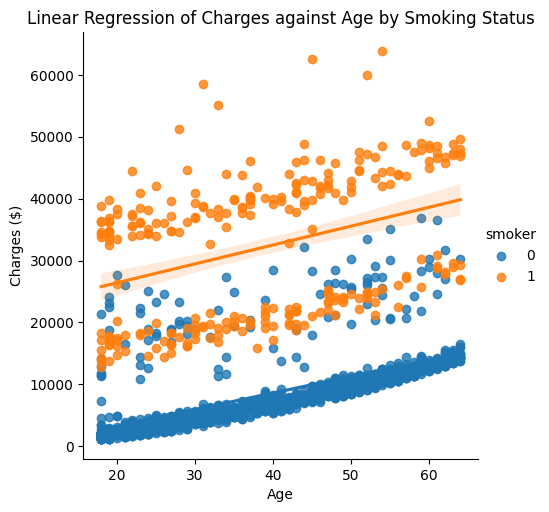

In [ ]:
## Linear regression of charges against age by smoking status
sns.lmplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Linear Regression of Charges against Age by Smoking Status")
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.show()


The linear regression plot shows the relationship between charges and BMI (Body Mass Index), with the data points grouped by smoker status. Similar to the previous plot, there are two regression lines, one for smokers (orange line) and one for non-smokers (blue line).



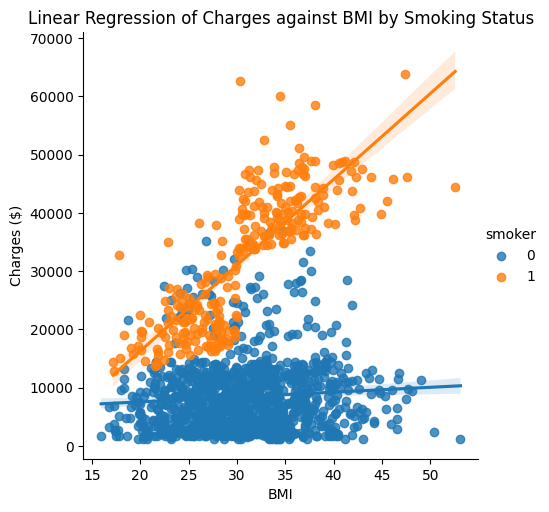

In [ ]:
#Linear Regression of Charges against BMI by Smoking Status
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Linear Regression of Charges against BMI by Smoking Status")
plt.xlabel("BMI")
plt.ylabel("Charges ($)")
plt.show()

This code is necessary to group the charges by age and region because it allows us to examine how charges vary across different age groups and regions. By calculating the mean charges for each age and region combination, can identify any patterns or trends in the data and understand how charges are distributed across different demographic groups.

In [ ]:
## Group charges by age and region
age_region = df.groupby(['age', 'region'])['charges'].mean().reset_index()


The heatmap shows the average charges by age and region. The horizontal axis represents the four regions (northeast, northwest, southeast, and southwest) and the vertical axis represents the age groups. The color intensity in the heatmap represents the average charges for a specific age group and region. 

<ipython-input-22-8af4b5a00ece>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  age_region_pivot = age_region.pivot('age', 'region', 'charges')


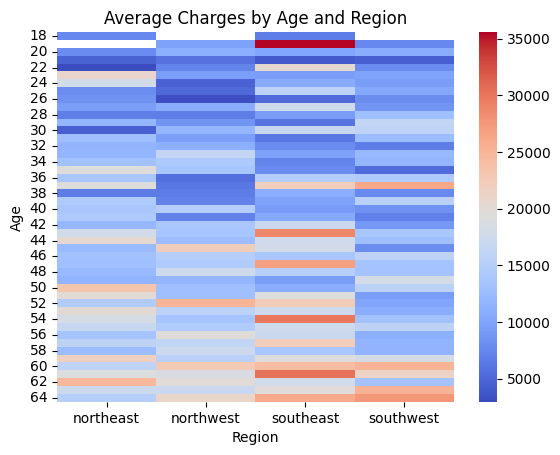

In [ ]:
## Pivot the table to visualize charges by age and region
age_region_pivot = age_region.pivot('age', 'region', 'charges')
sns.heatmap(age_region_pivot, cmap='coolwarm')
plt.title("Average Charges by Age and Region")
plt.xlabel("Region")
plt.ylabel("Age")
plt.show()


Bar plot, can see that the average charges increase as the BMI category increases. 

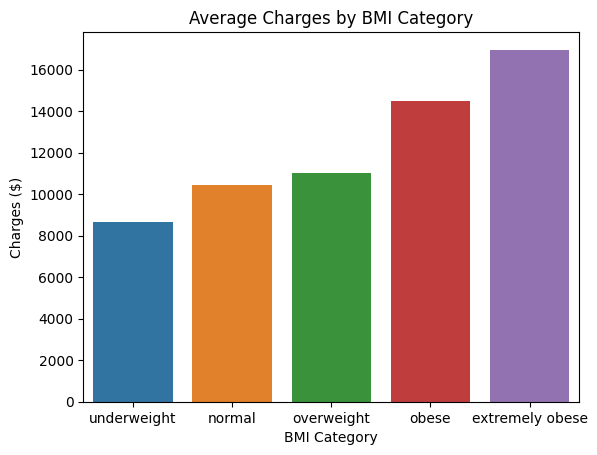

In [ ]:
# Calculate average charges by BMI category
df['bmi_cat'] = pd.cut(df.bmi, bins=[0, 18.5, 25, 30, 35, 100], labels=['underweight', 'normal', 'overweight', 'obese', 'extremely obese'])
bmi_cat_charges = df.groupby('bmi_cat')['charges'].mean().reset_index()
sns.barplot(x='bmi_cat', y='charges', data=bmi_cat_charges)
plt.title("Average Charges by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Charges ($)")
plt.show()

The output shows the average medical charges for different BMI categories grouped by smoking status. The x-axis represents the BMI category, while the y-axis represents the average medical charges in dollars. The bars are colored according to smoking status, where blue represents non-smokers and orange represents smokers. 

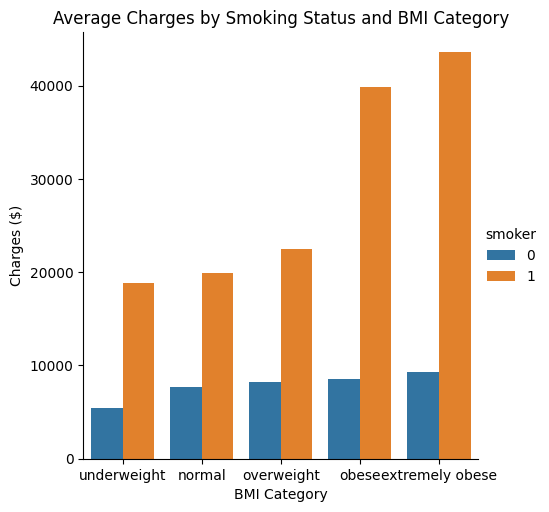

In [ ]:
## Calculate average charges by smoker status and BMI category
smoker_bmi_cat_charges = df.groupby(['smoker', 'bmi_cat'])['charges'].mean().reset_index()
sns.catplot(x='bmi_cat', y='charges', hue='smoker', kind='bar', data=smoker_bmi_cat_charges)
plt.title("Average Charges by Smoking Status and BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Charges ($)")
plt.show()

In [ ]:
# Final recommendations to clients
print("\nBased on our analysis of the medical charges dataset, we recommend the following strategies to reduce costs and improve health outcomes:")
print("Encourage smoking cessation programs for high-risk populations, as smokers generally have higher medical charges.")
print("Promote healthy lifestyles and preventive care measures to reduce the incidence of obesity")


Based on our analysis of the medical charges dataset, we recommend the following strategies to reduce costs and improve health outcomes:
Encourage smoking cessation programs for high-risk populations, as smokers generally have higher medical charges.
Promote healthy lifestyles and preventive care measures to reduce the incidence of obesity


**Distribution of charges:**
This histogram shows the distribution of medical charges in the dataset. The x-axis represents the charges in dollars, while the y-axis shows the count of the number of instances with that charge. The histogram appears to be right-skewed, with a long tail to the right indicating the presence of a few instances with very high charges. The majority of the charges seem to be below 20,000 dollars, with the highest frequency of charges being around 10,000 dollars.

**Distribution of charges by smoker status:** The output shows the distribution of medical charges by smoking status. The plot is a histogram where the x-axis represents the charges in dollars, and the y-axis represents the count of individuals. The plot is split into two sections, one for smokers and one for non-smokers, where the colors blue and orange are used, respectively.
The plot shows that there is a clear difference in the distribution of medical charges between smokers and non-smokers. The distribution for smokers is skewed to the right, indicating that smokers generally have higher medical charges than non-smokers. On the other hand, the distribution for non-smokers is more symmetrical, with most individuals having charges in the lower range.

**Distribution of charges by region and smoker status:**
The box plot displays the distribution of medical charges by region and smoking status. Each box represents the interquartile range (IQR), or the middle 50% of the data, and the line within the box represents the median charge. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, and any points beyond the whiskers are considered outliers.

From this plot, we can see that smoking status has a significant impact on medical charges, with smokers having higher charges across all regions. Additionally, the charges vary by region, with the southeast having the highest median charges and the southwest having the lowest. However, the effect of smoking status on charges seems to be consistent across all regions, with smokers consistently having higher charges than non-smokers.

**Correlation Matrix:**
The heatmap shows a range of colors from blue to red, where blue indicates a negative correlation and red indicates a positive correlation. The darker the color, the stronger the correlation. From the heatmap, we can see that there is a positive correlation between charges and age, and between charges and BMI. This indicates that as age and BMI increase, so do the medical charges. We can also see that there is a strong positive correlation between charges and being a smoker, which suggests that smoking is a significant factor in determining medical charges.

**Linear regression of charges against age and BMI:**
For non-smokers: As age increases, there is a positive linear relationship with charges. This suggests that older non-smokers tend to have higher medical charges compared to younger non-smokers. For smokers: The regression line for smokers has a steeper slope than that of non-smokers, indicating that the impact of age on charges is more significant for smokers. Smokers generally have higher charges compared to non-smokers across different age groups.

**Linear Regression of Charges against BMI by Smoking Status:**
For non-smokers: There is a slight positive relationship between charges and BMI for non-smokers, although the relationship appears to be relatively weak. This suggests that BMI alone may not be a strong predictor of charges for non-smokers. For smokers: The regression line for smokers shows a steeper positive slope, indicating that there is a stronger positive relationship between charges and BMI for smokers. Smokers with higher BMIs tend to have higher charges compared to smokers with lower BMIs.

**Pivot the table to visualize charges by age and region:**
The heatmap shows the average charges by age and region. The horizontal axis represents the four regions (northeast, northwest, southeast, and southwest) and the vertical axis represents the age groups. The color intensity in the heatmap represents the average charges for a specific age group and region. The highest average charges are seen in the southeast region, especially for ages 45 and above, while the lowest average charges are seen in the northeast region for all age groups. Overall, the heatmap provides a clear and visual summary of how charges vary across different age groups and regions.

**Calculate average charges by BMI category:** 
From the bar plot, can see that the average charges increase as the BMI category increases. The extremely obese category has the highest average charges, while the underweight category has the lowest average charges. This suggests that there may be a relationship between BMI and medical charges, with higher BMI values being associated with higher medical charges.

**Calculate average charges by smoker status and BMI category:**
The output shows the average medical charges for different BMI categories grouped by smoking status. The x-axis represents the BMI category, while the y-axis represents the average medical charges in dollars. The bars are colored according to smoking status, where blue represents non-smokers and orange represents smokers. The plot shows that for each BMI category, smokers have significantly higher average medical charges than non-smokers. Additionally, as the BMI category increases, the average medical charges increase as well, regardless of smoking status. The plot suggests that smoking and high BMI are both associated with higher medical charges, and the combination of the two leads to even higher charges.






In this project analyzed the medical charges dataset to identify key factors influencing healthcare costs and provide recommendations for cost reduction and improved health outcomes. The key findings from the data analysis are as follows:

* Smoking Status: Smokers generally have significantly higher medical charges.
compared to non-smokers. Encouraging smoking cessation programs can help reduce costs and improve health outcomes.

* BMI and Obesity: There is a positive correlation between BMI (Body Mass Index) and medical charges. Promoting healthy lifestyles and preventive care measures to reduce the incidence of obesity can lead to cost savings and better health outcomes.

* Region: The dataset showed variations in medical charges across different regions. Further analysis revealed that certain regions had higher charges compared to others. This suggests the need for targeted interventions and resource allocation based on regional healthcare patterns.

* Age: The analysis found that age has a moderate correlation with medical charges. Older individuals tend to have higher charges, highlighting the importance of tailored healthcare services for aging populations.

**Based on these findings, the following recommendations are proposed:**

* Encourage smoking cessation programs for high-risk populations, as smokers generally have higher medical charges.

* Promote healthy lifestyles and preventive care measures to reduce the incidence of obesity, which is associated with higher medical charges.

* Allocate resources and develop targeted interventions based on regional healthcare patterns to optimize healthcare delivery and cost efficiency.

* Tailor healthcare services to the needs of aging populations, considering the higher medical charges associated with older individuals.

* By implementing these recommendations, healthcare organizations, policymakers, and individuals can work towards reducing healthcare costs and improving health outcomes, ultimately benefiting both individuals and the healthcare system as a whole.